In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/dataset_reduced.csv')

data['target_class'] = pd.qcut(data['Specific capacity'], q=10, labels=False)
X = data.drop(['Specific capacity', 'target_class'], axis=1)
y = data['Specific capacity']
stratify_column = data['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train

,O,N,Specific surface area,Pore volume,Dap,ID/IG,Current density,micro%
484,15.55,2.61,3139.20,1.740,2.217125,1.020,5.0,0.557471
145,7.71,0.00,804.00,0.315,1.567164,0.970,4.0,0.621891
491,15.55,2.61,3139.20,1.740,2.217125,1.020,100.0,0.557471
463,8.35,2.41,2511.00,2.170,3.456790,2.070,10.0,0.437788
216,4.89,1.74,1666.80,2.420,5.807535,0.880,5.0,0.119835
...,...,...,...,...,...,...,...,...
460,8.35,2.41,2511.00,2.170,3.456790,2.070,1.0,0.437788
224,6.42,2.75,1301.60,3.040,9.342348,0.920,0.5,0.069079
375,3.37,0.00,3252.60,3.428,4.215704,1.020,10.0,0.099475
340,6.75,2.16,2363.18,1.330,2.251204,0.790,1.0,0.398496


In [2]:
statistics = X_train.describe(include='all')
statistics

,O,N,Specific surface area,Pore volume,Dap,ID/IG,Current density,micro%
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,8.987525,2.980891,1786.306040,1.280669,3.049981,1.241049,11.024752,0.445108
std,4.304356,2.826483,896.356035,0.699970,1.464967,0.653385,23.006274,0.236566
min,1.900000,0.000000,225.220000,0.100000,1.488390,0.700000,0.050000,0.060606
25%,6.150000,1.300000,1021.000000,0.790000,2.147821,0.917000,0.500000,0.216867
50%,8.060000,2.440000,1667.330000,1.200000,2.508328,1.020000,3.000000,0.481865
75%,11.200000,3.670000,2370.000000,1.740000,3.601896,1.120000,10.000000,0.621891
max,21.550000,13.570000,3553.100000,3.428000,9.342348,4.400000,200.000000,0.954463


In [3]:
median = statistics.iloc[5]
median

O                           8.060000
N                           2.440000
Specific surface area    1667.330000
Pore volume                 1.200000
Dap                         2.508328
ID/IG                       1.020000
Current density             3.000000
micro%                      0.481865
Name: 50%, dtype: float64

In [10]:
import pandas as pd
import numpy as np

# 固定列的值
fixed_values = {
    "Specific surface area": 1667.3,
    "Pore volume": 1.2,
    "Dap": 2.508,
    "ID/IG": 1.02,
    "micro%": 0.48,
    "Current density": 0.2
}

# 生成等距分布的Dap和ID/IG的值
N_values = np.linspace(1, 20, 100)
O_values = np.linspace(1, 30, 100)

columns = [
    "O", "N", "Specific surface area", "Pore volume", "Dap", "ID/IG", 
     "Current density", "micro%", 
]

# 创建一个空的DataFrame
data = []

# 填充数据
for O in O_values:
    for N in N_values:
        row = fixed_values.copy()
        row["N"] = N
        row["O"] = O
        data.append(row)

df = pd.DataFrame(data, columns=columns)
df

,O,N,Specific surface area,Pore volume,Dap,ID/IG,Current density,micro%
0,1.0,1.000000,1667.3,1.2,2.508,1.02,0.2,0.48
1,1.0,1.191919,1667.3,1.2,2.508,1.02,0.2,0.48
2,1.0,1.383838,1667.3,1.2,2.508,1.02,0.2,0.48
3,1.0,1.575758,1667.3,1.2,2.508,1.02,0.2,0.48
4,1.0,1.767677,1667.3,1.2,2.508,1.02,0.2,0.48
...,...,...,...,...,...,...,...,...
9995,30.0,19.232323,1667.3,1.2,2.508,1.02,0.2,0.48
9996,30.0,19.424242,1667.3,1.2,2.508,1.02,0.2,0.48
9997,30.0,19.616162,1667.3,1.2,2.508,1.02,0.2,0.48
9998,30.0,19.808081,1667.3,1.2,2.508,1.02,0.2,0.48


In [11]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=80,
                             learning_rate=0.14,
                             subsample=0.5,
                             gamma=0.1,
                             max_depth=8,
                             min_child_weight=2,
                             reg_alpha=0.26,
                             colsample_bytree=0.7,
                             colsample_bylevel=1.0,
                             colsample_bynode=0.6,
                             random_state=21)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
y_generated_pred = xgb.predict(df)

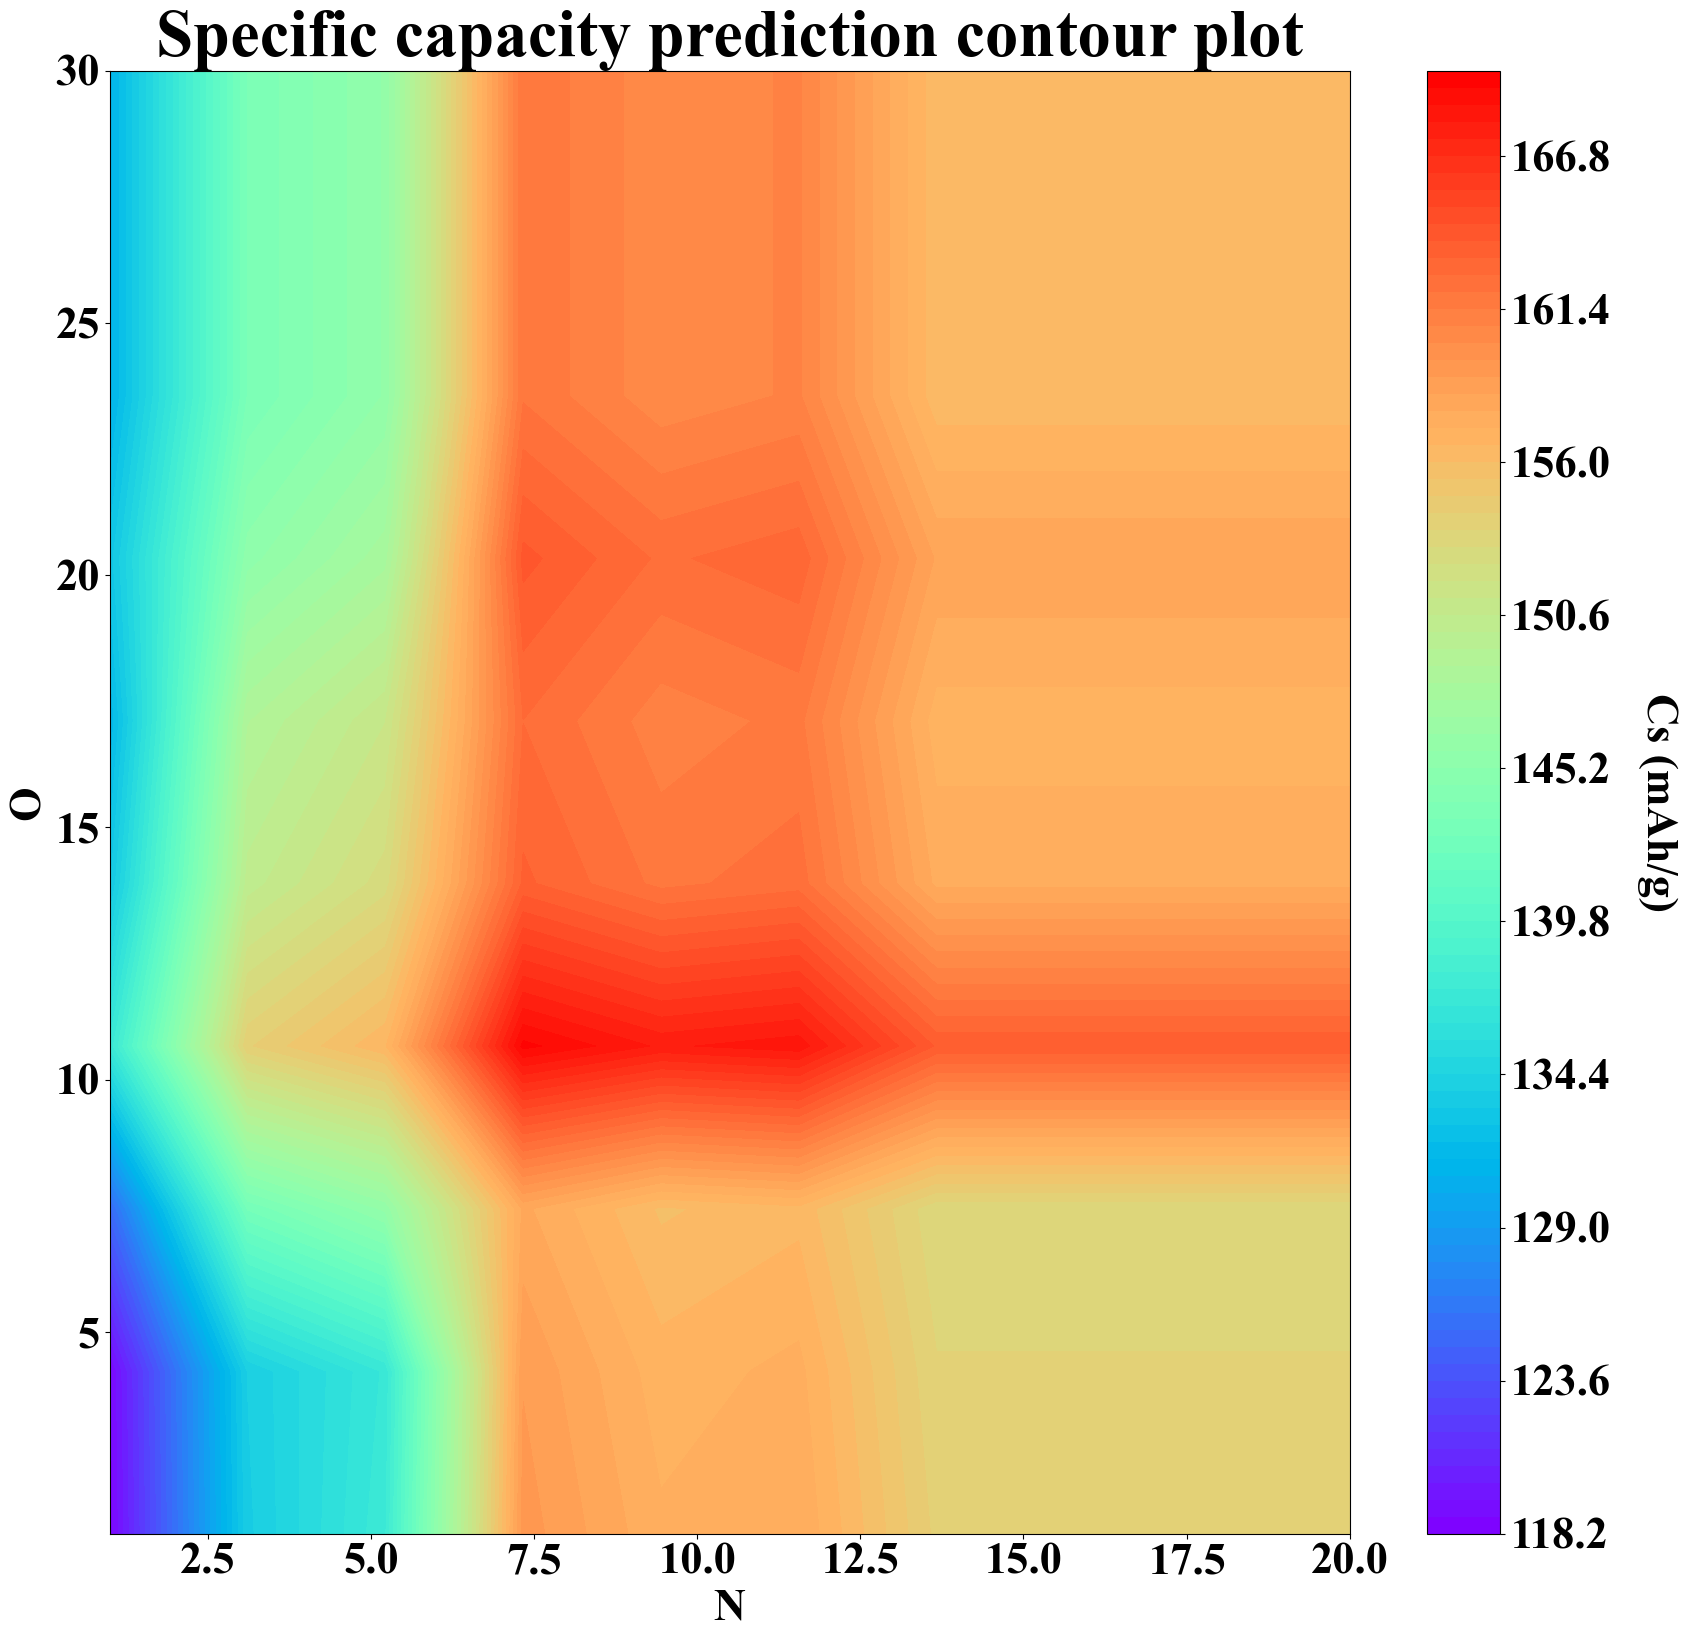

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 生成示例数据
# 这部分需要替换为你的实际数据
feature_1 = df['N']
feature_2 = df['O']
c = y_generated_pred

# 创建网格数据
x = np.linspace(1, 20, 10)
y = np.linspace(1, 30, 10)
X, Y = np.meshgrid(x, y)

# 插值
Z = griddata((feature_1, feature_2), c, (X, Y), method='cubic')

# 绘制等高线图
plt.figure(figsize=(20, 19))
plt.rcParams.update({
        'font.family': 'Times New Roman',
        'font.weight': 'bold',
        'figure.figsize': (10, 10)  # 设置图像尺寸为10x10英寸
    })
contour = plt.contourf(X, Y, Z, levels=100, cmap='rainbow')
cbar = plt.colorbar(contour)
cbar.set_label('Cs (mAh/g)', rotation=270, labelpad=48, fontweight='bold', fontsize=32)

# 设置轴标签和标题
plt.xlabel('N', fontweight='bold', fontsize=32)
plt.ylabel('O', fontweight='bold', fontsize=32)
plt.title('Specific capacity prediction contour plot', fontweight='bold', fontsize=48)
plt.savefig('output/figures/contour_N&O.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()


In [25]:
fixed_values = {
    "O": 8,
    "N": 2.5,
    # "Specific surface area": 1667.3,
    "Pore volume": 1.2,
    "Dap": 2.508,
    "ID/IG": 1.02,
    # "micro%": 0.48,
    "Current density": 0.2
}

# 生成等距分布的Dap和ID/IG的值
SSA_values = np.linspace(200, 3600, 100)
ratio_values = np.linspace(0, 1, 100)

columns = [
    "O", "N", "Specific surface area", "Pore volume", "Dap", "ID/IG", 
     "Current density", "micro%", 
]

# 创建一个空的DataFrame
data = []

# 填充数据
for SSA in SSA_values:
    for ratio in ratio_values:
        row = fixed_values.copy()
        row["Specific surface area"] = SSA
        row["micro%"] = ratio
        data.append(row)

df = pd.DataFrame(data, columns=columns)
df

,O,N,Specific surface area,Pore volume,Dap,ID/IG,Current density,micro%
0,8,2.5,200.0,1.2,2.508,1.02,0.2,0.000000
1,8,2.5,200.0,1.2,2.508,1.02,0.2,0.010101
2,8,2.5,200.0,1.2,2.508,1.02,0.2,0.020202
3,8,2.5,200.0,1.2,2.508,1.02,0.2,0.030303
4,8,2.5,200.0,1.2,2.508,1.02,0.2,0.040404
...,...,...,...,...,...,...,...,...
9995,8,2.5,3600.0,1.2,2.508,1.02,0.2,0.959596
9996,8,2.5,3600.0,1.2,2.508,1.02,0.2,0.969697
9997,8,2.5,3600.0,1.2,2.508,1.02,0.2,0.979798
9998,8,2.5,3600.0,1.2,2.508,1.02,0.2,0.989899


In [26]:
y_generated_pred = xgb.predict(df)

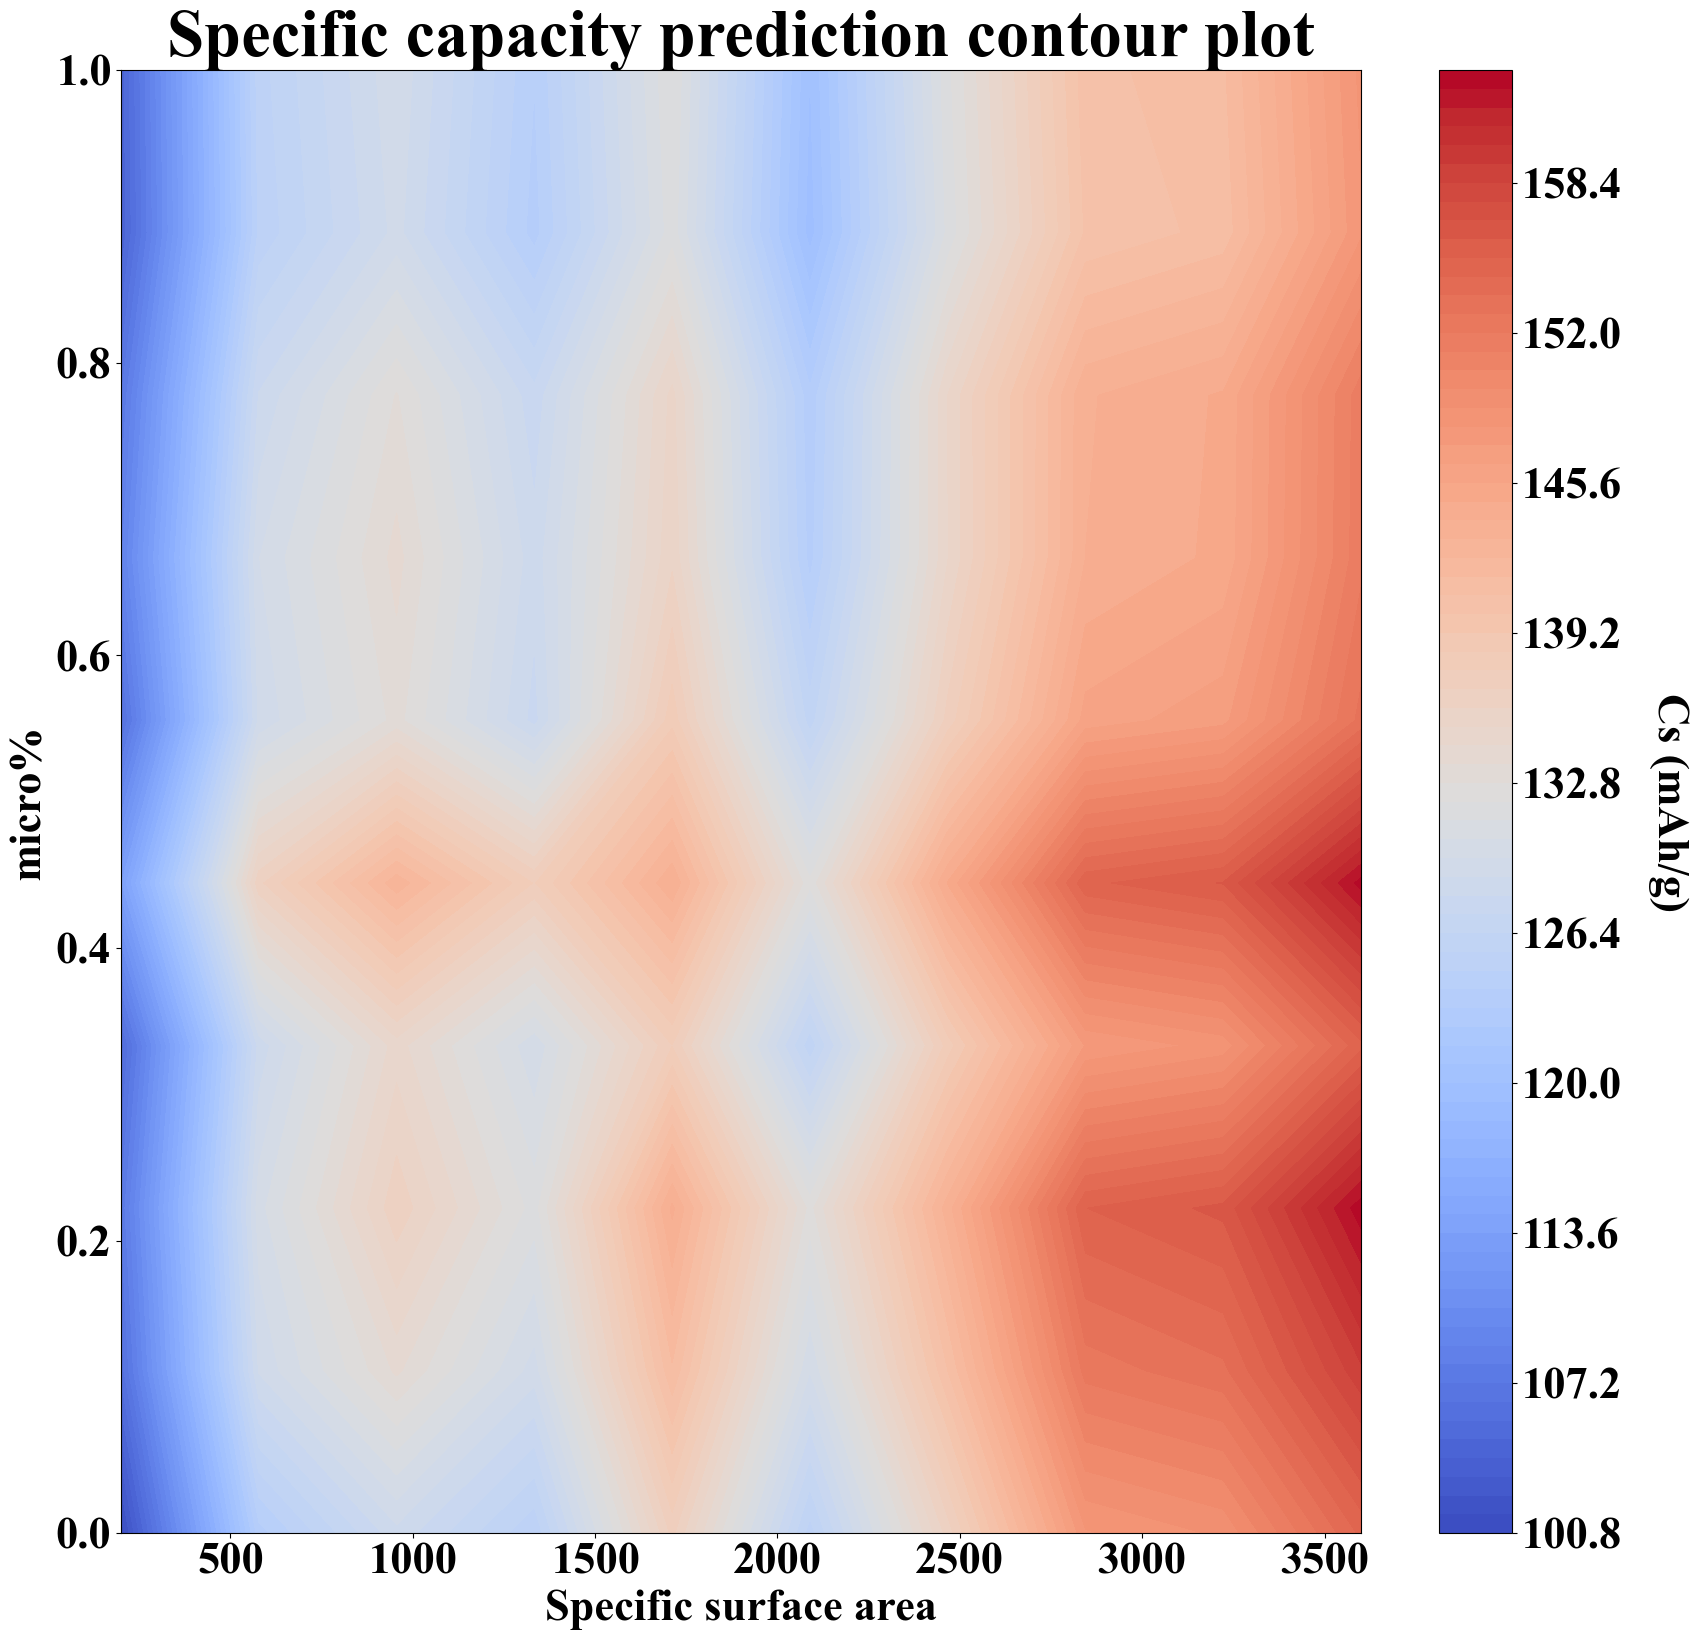

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 生成示例数据
# 这部分需要替换为你的实际数据
feature_1 = df['Specific surface area']
feature_2 = df['micro%']
c = y_generated_pred

# 创建网格数据
x = np.linspace(200, 3600, 10)
y = np.linspace(0, 1, 10)
X, Y = np.meshgrid(x, y)

# 插值
Z = griddata((feature_1, feature_2), c, (X, Y), method='cubic')

# 绘制等高线图
plt.figure(figsize=(20, 19))
plt.rcParams.update({
        'font.family': 'Times New Roman',
        'font.weight': 'bold',
        'figure.figsize': (10, 10)  # 设置图像尺寸为10x10英寸
    })
contour = plt.contourf(X, Y, Z, levels=100, cmap='coolwarm')
cbar = plt.colorbar(contour)
cbar.set_label('Cs (mAh/g)', rotation=270, labelpad=48, fontweight='bold', fontsize=32)

# 设置轴标签和标题
plt.xlabel('Specific surface area', fontweight='bold', fontsize=32)
plt.ylabel('micro%', fontweight='bold', fontsize=32)
plt.title('Specific capacity prediction contour plot', fontweight='bold', fontsize=48)
plt.savefig('output/figures/contour_SSA&ratio.png', bbox_inches='tight', transparent=True, dpi=300)
plt.show()
